# **Version 2**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense
from sklearn.model_selection import train_test_split
import yfinance as yf

In [3]:
googl_data = yf.download('GOOGL', start='2020-01-01', end='2023-01-01')
googl_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
2020-01-03,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2020-01-06,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
2020-01-07,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
2020-01-08,69.740997,70.592499,69.631500,70.251999,70.251999,35314000


## Analyzing trend of stock price

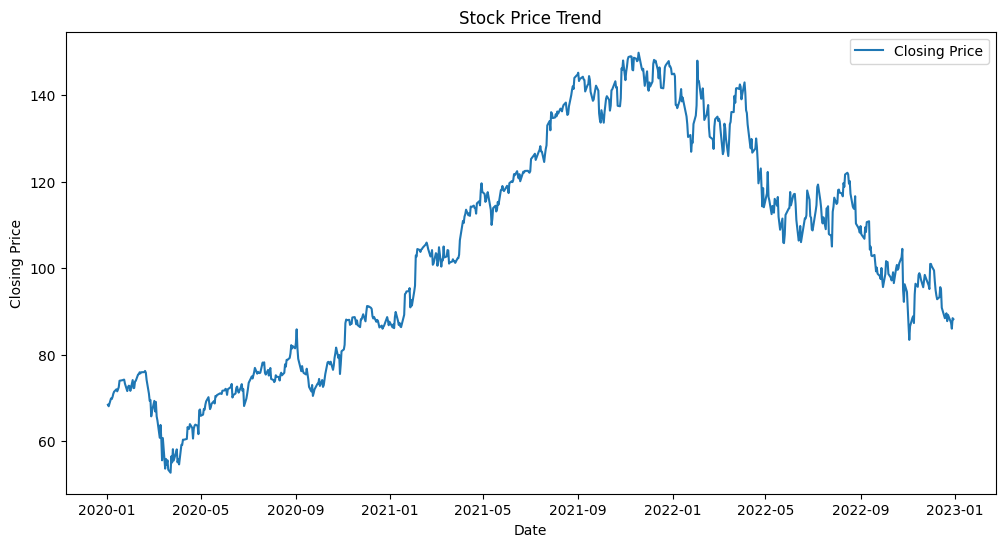

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(googl_data.index, googl_data['Close'], label='Closing Price')
plt.title('Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Preprocess data

In [5]:
data = googl_data[['Close']].values.astype(float)
#Normalising Data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

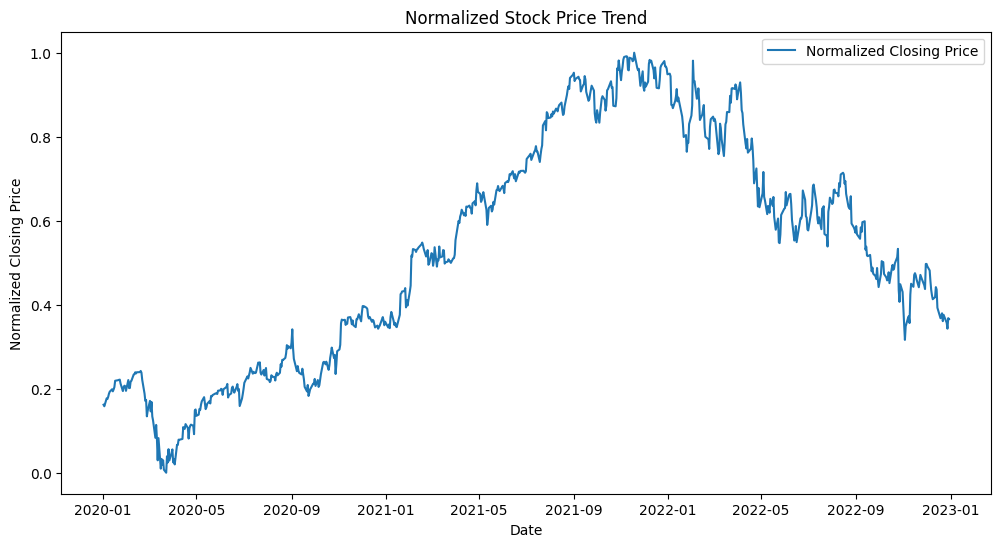

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(googl_data.index, data_scaled, label='Normalized Closing Price')
plt.title('Normalized Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price')
plt.legend()
plt.show()

In [7]:
X, y = [], []
for i in range(len(data_scaled) - 60):
    X.append(data_scaled[i:(i + 60), 0])
    y.append(data_scaled[i + 60, 0])

X, y = np.array(X), np.array(y)

#Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Comparing SimpleRNN, LSTM, GRU and Bidirectional LSTM

In [8]:
models = []
#SimpleRNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
models.append(('SimpleRNN', model))

#LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
models.append(('LSTM', model))

#GRU
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
models.append(('GRU', model))

#Bidirectional LSTM
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
models.append(('Bidirectional LSTM', model))

### Training and evaluating by iterating through the 'models' list

In [9]:
#Using 100 epochs for training
for name, model in models:
    model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
18/18 [==============================] - 2s 11ms/step - loss: 0.2390
Epoch 2/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0174
Epoch 3/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0020
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 8.7767e-04
Epoch 5/100
18/18 [==============================] - 0s 11ms/step - loss: 7.5618e-04
Epoch 6/100
18/18 [==============================] - 0s 11ms/step - loss: 7.4123e-04
Epoch 7/100
18/18 [==============================] - 0s 11ms/step - loss: 7.3979e-04
Epoch 8/100
18/18 [==============================] - 0s 12ms/step - loss: 7.9990e-04
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 7.5918e-04
Epoch 10/100
18/18 [==============================] - 0s 11ms/step - loss: 7.0234e-04
Epoch 11/100
18/18 [==============================] - 0s 11ms/step - loss: 6.7299e-04
Epoch 12/100
18/18 [==============================] - 0s 11ms/step - loss: 

In [10]:
#Evaluating the model
for name, model in models:
    predictions = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
    predictions = scaler.inverse_transform(predictions)

    mae = mean_absolute_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)
    rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions))
    r2 = r2_score(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)

    print(f'{name} Metrics:')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'R squared: {r2}')
    print('---')

5/5 [==============================] - 0s 5ms/step
SimpleRNN Metrics:
MAE: 1.5319846017020093
RMSE: 2.0521899924587848
R squared: 0.9935493166651922
---
5/5 [==============================] - 0s 7ms/step
LSTM Metrics:
MAE: 1.8795116424560554
RMSE: 2.4616634626565252
R squared: 0.990718290936163
---
5/5 [==============================] - 0s 6ms/step
GRU Metrics:
MAE: 1.6709081104823533
RMSE: 2.1905973063274566
R squared: 0.9926498586582526
---
5/5 [==============================] - 0s 10ms/step
Bidirectional LSTM Metrics:
MAE: 2.0314384187970855
RMSE: 2.6530028542795248
R squared: 0.9892193231967323
---


# Plot of model predictions

5/5 [==============================] - 0s 10ms/step


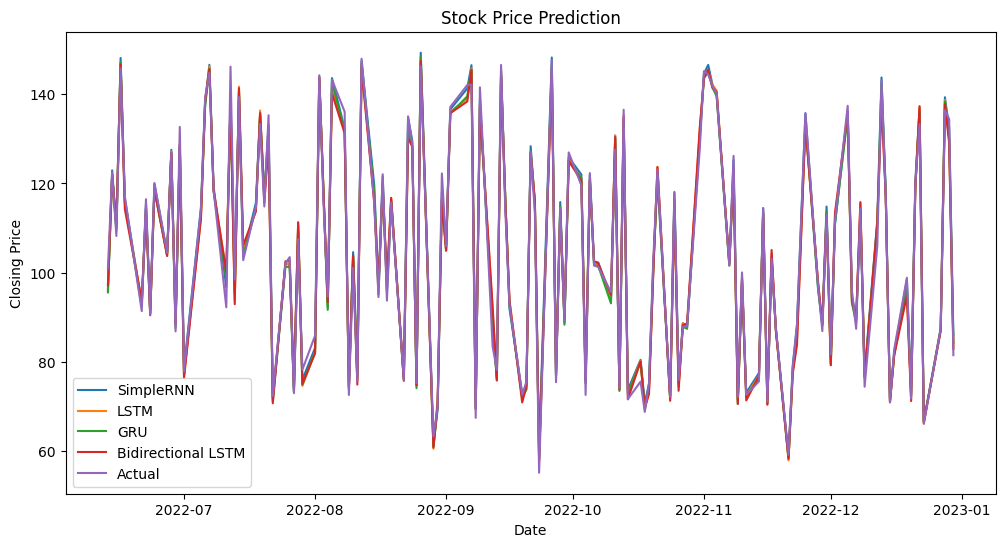

In [11]:
plt.figure(figsize=(12, 6))
for name, model in models:
    predictions = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
    predictions = scaler.inverse_transform(predictions)
    plt.plot(googl_data.index[-len(X_test):], predictions, label=name)

plt.plot(googl_data.index[-len(X_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


5/5 [==============================] - 0s 10ms/step


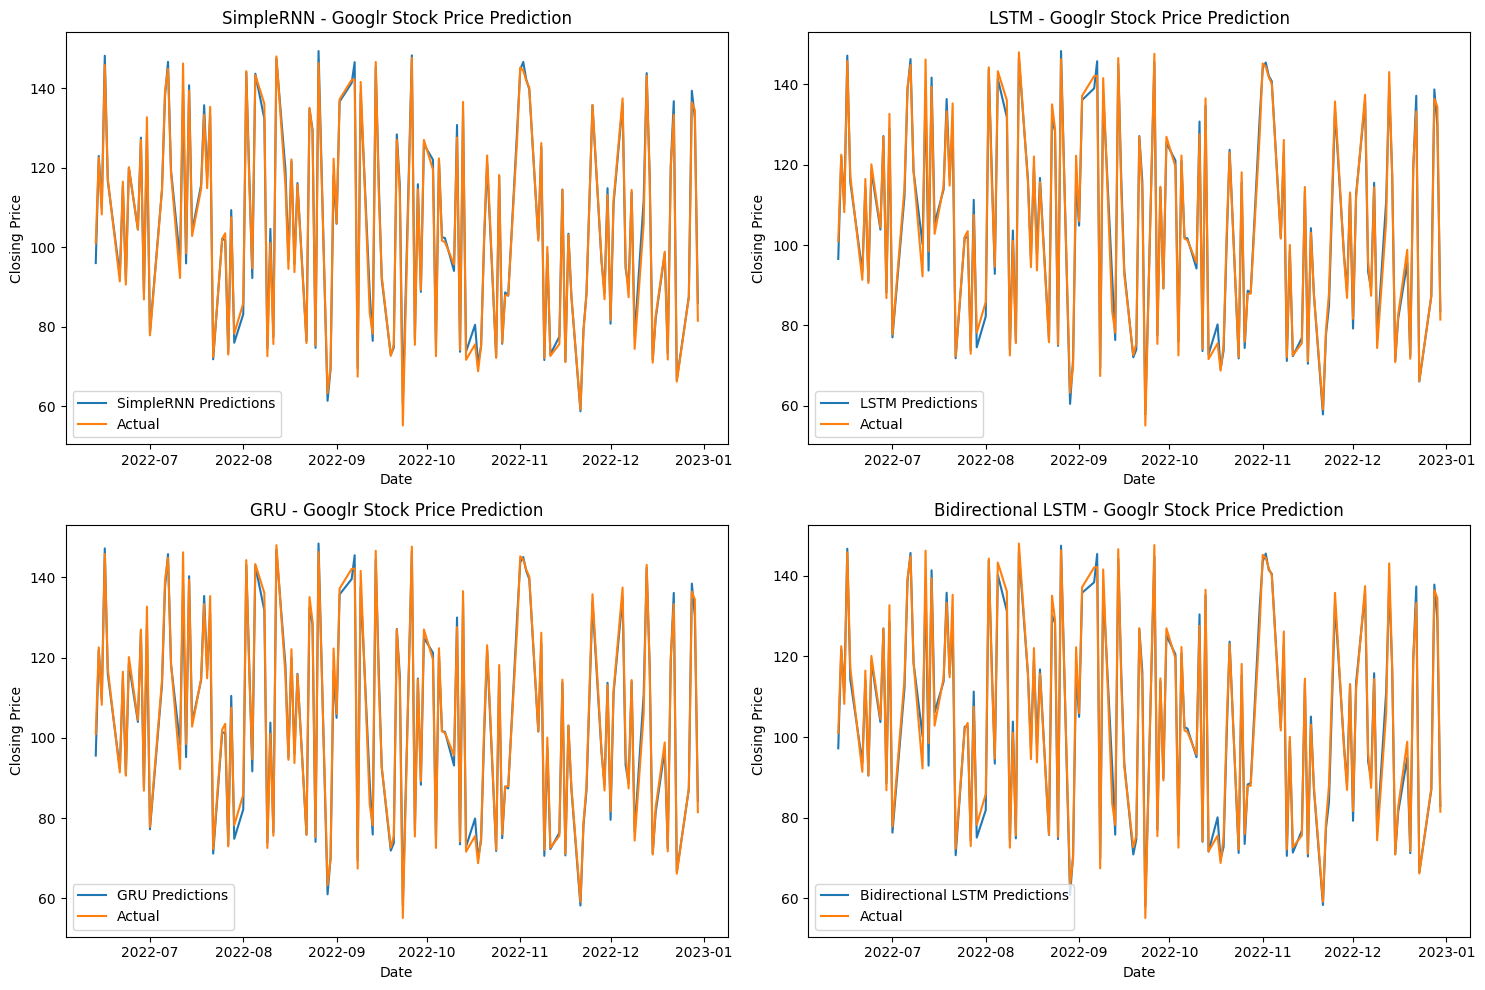

In [14]:
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models, 1):
    predictions = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
    predictions = scaler.inverse_transform(predictions)

    plt.subplot(2, 2, i)
    plt.plot(googl_data.index[-len(X_test):], predictions, label=f'{name} Predictions')
    plt.plot(googl_data.index[-len(X_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
    plt.title(f'{name} - Googlr Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()

plt.tight_layout()
plt.show()